# IBM HR Analytics: Employee Attrition Analysis

This notebook demonstrates a complete data analysis workflow on the IBM HR Analytics Employee Attrition dataset. We will explore the data, perform preprocessing, conduct exploratory data analysis (EDA), and build a predictive model to identify factors related to employee attrition.

## Objectives
- Understand and clean the dataset
- Explore key trends and patterns
- Build a logistic regression model to predict attrition
- Document the process and findings

## Step 1: Data Acquisition and Initial Exploration

### Downloading and Loading the Dataset
Download the dataset from [Kaggle](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset) and place the CSV file in your working directory.

In [7]:
import pandas as pd

# Load the dataset
df = pd.read_csv('./WA_Fn-UseC_-HR-Employee-Attrition.csv')


# Display the first few rows
print(df.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [8]:
# Get basic info about the dataset
print(df.info())

# Statistical summary for numerical columns
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## Step 2: Data Cleaning and Preprocessing

### Checking for Missing Values
We first check if there are any missing values in the dataset.

In [9]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print(missing_values)

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### Converting and Creating Features
For modeling, convert the `Attrition` column to a binary variable.

In [10]:
# Convert 'Attrition' to a binary variable
df['Attrition_binary'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
print(df[['Attrition', 'Attrition_binary']].head())

  Attrition  Attrition_binary
0       Yes                 1
1        No                 0
2       Yes                 1
3        No                 0
4        No                 0


### Visualizing Outliers in Monthly Income
We use a box plot to inspect the distribution of the `MonthlyIncome` column.

<ipython-input-12-388e9a2a26c2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='JobRole', y='MonthlyIncome', data=df, palette='Set3')


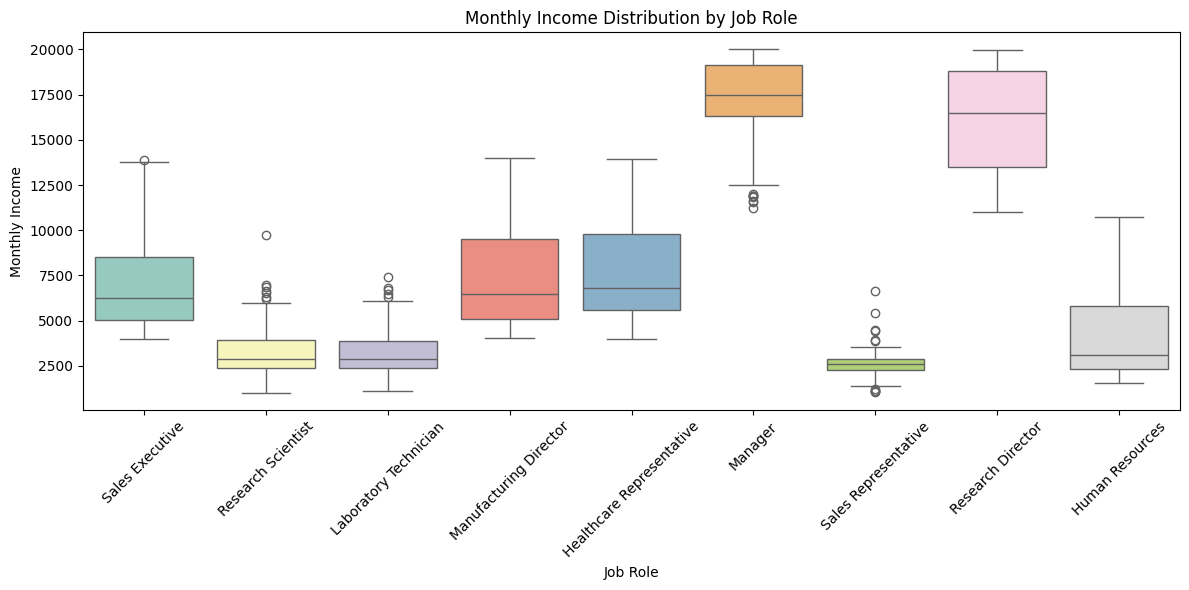

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.violinplot(x='Attrition', y='MonthlyIncome', data=df, palette='muted')
plt.title('Monthly Income Distribution by Attrition')
plt.ylabel('Monthly Income')
plt.xlabel('Attrition')
plt.show()


### This boxplot shows how Monthly Income varies across different Job Roles, highlighting differences in salary levels and income spread for each role. It helps spot high-paying roles and potential outliers in compensation.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='JobRole', y='MonthlyIncome', data=df, palette='Set3')
plt.title('Monthly Income Distribution by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Monthly Income')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Step 3: Exploratory Data Analysis (EDA)

### Descriptive Statistics and Visualizations
We explore the dataset by analyzing distributions and relationships between key variables.

In [ ]:
# Display descriptive statistics
print(df.describe())

               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335            

### Age Distribution
Let's visualize the distribution of employee ages.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


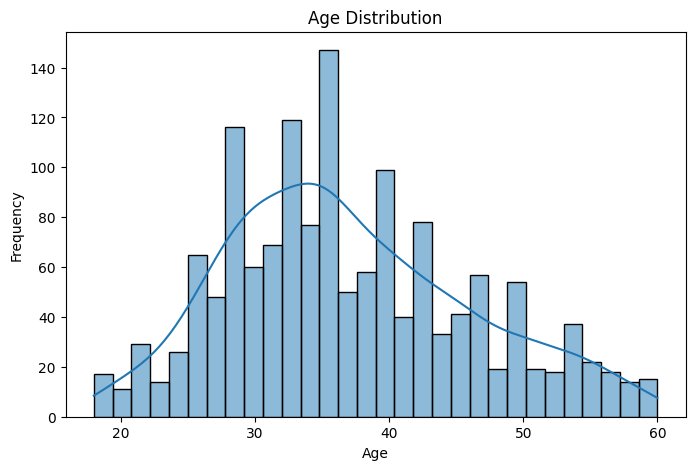

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Attrition Count
Visualize the count of employees who have left versus those who have stayed.

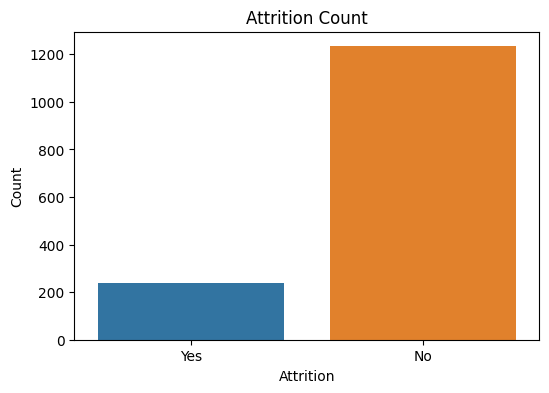

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Attrition', data=df)
plt.title('Attrition Count')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

### Correlation Matrix
We create a heatmap to inspect the correlations between numerical variables.

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


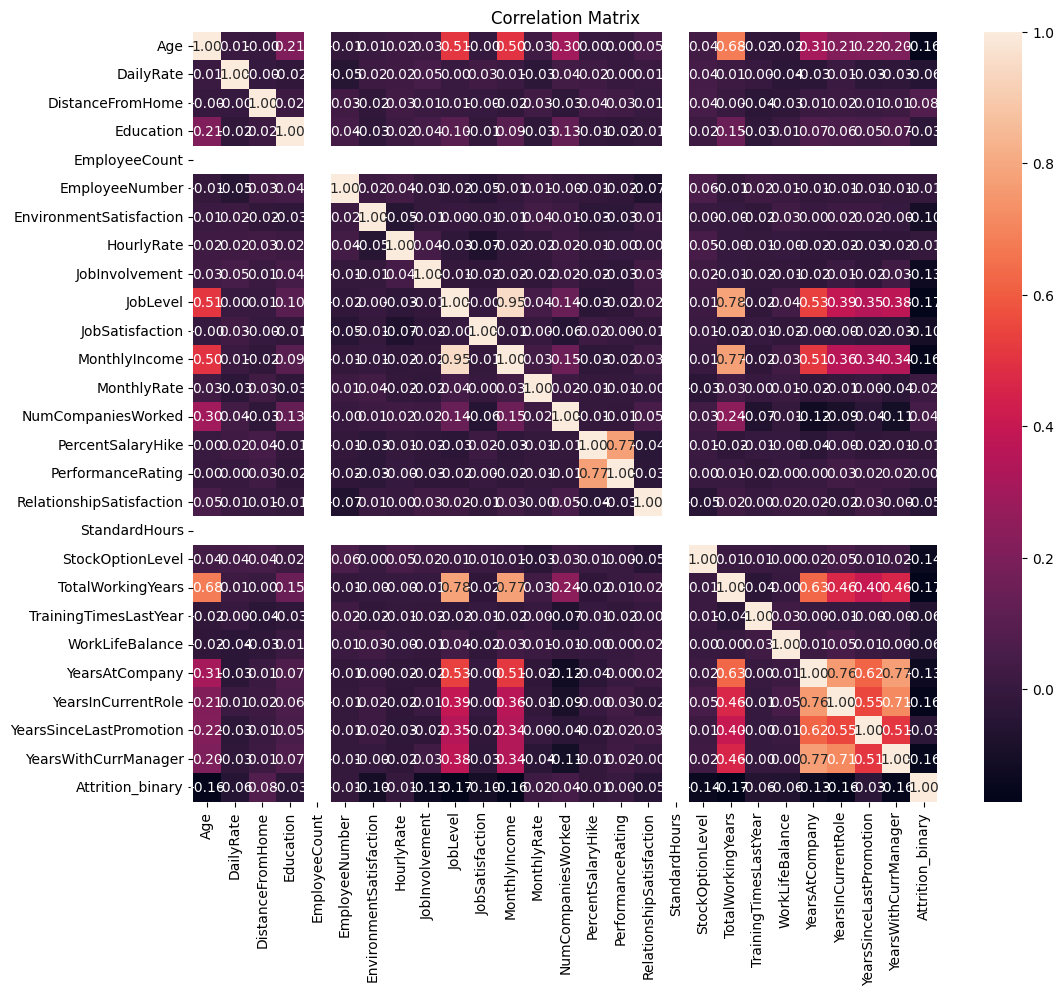

In [ ]:
import numpy as np
# Filter only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix on numeric data only
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## Step 4: In-Depth Analysis and Modeling

### Feature Engineering
Create additional features to potentially improve the predictive model. For example, you might bucket employees by tenure.

In [ ]:
df['TenureBucket'] = pd.cut(df['YearsAtCompany'], bins=[0, 3, 7, 15, 40], labels=['New', 'Junior', 'Mid', 'Senior'])
print(df[['YearsAtCompany', 'TenureBucket']].head())

   YearsAtCompany TenureBucket
0               6       Junior
1              10          Mid
2               0          NaN
3               8          Mid
4               2          New


### Predictive Modeling: Logistic Regression
We use logistic regression to predict employee attrition.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Select features for the model
features = df[['Age', 'MonthlyIncome', 'JobSatisfaction', 'YearsAtCompany']]
target = df['Attrition_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       0.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.87      0.81       294



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
